In [ ]:
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124 ultralytics tqdm PIL
# pip uninstall opencv-python opencv-python-headless -y
# pip install opencv-python-headless

In [ ]:
# import pandas as pd

# df = pd.read_csv('./csv/landmark_digitalization_2.csv')
# df.head()

In [ ]:
# from PIL import Image

# # iterate through df and convert x1, y1, x2, y2 to new coordinates
# for i, row in df.iterrows():
#     img_name = row['ant']
#     x1, y1, x2, y2 = row['x1_lmk'], row['y1_lmk'], row['x2_lmk'], row['y2_lmk']
#     x1_bar, y1_bar, x2_bar, y2_bar = row['x1_bar'], row['y1_bar'], row['x2_bar'], row['y2_bar']
#     img_path = f'./original/{img_name}'
#     if not os.path.exists(img_path):
#         continue

#     # Open the image
#     img = Image.open(img_path)
#     original_width, original_height = img.size
    
#     # Invwert x coordinates
#     x1_norm = x1/original_width
#     x2_norm = x2/original_width

#     # Invert y coordinates
#     y1_norm = (original_height - y1) / original_height
#     y2_norm = (original_height - y2) / original_height
    
#     # do the same for x1_bar, y1_bar, x2_bar, y2_bar
#     x1_bar_norm = x1_bar/original_width
#     x2_bar_norm = x2_bar/original_width
#     y1_bar_norm = (original_height - y1_bar) / original_height
#     y2_bar_norm = (original_height - y2_bar) / original_height
    
#     # Save the new coordinates
#     df.loc[i, 'x1_lmk'] = x1_norm * 640
#     df.loc[i, 'y1_lmk'] = y1_norm * 640
#     df.loc[i, 'x2_lmk'] = x2_norm  * 640
#     df.loc[i, 'y2_lmk'] = y2_norm  * 640
#     df.loc[i, 'x1_bar'] = x1_bar_norm * 640
#     df.loc[i, 'y1_bar'] = y1_bar_norm * 640
#     df.loc[i, 'x2_bar'] = x2_bar_norm * 640
#     df.loc[i, 'y2_bar'] = y2_bar_norm * 640
    
# df.to_csv('./csv/landmark_digitalization_3.csv', index=False)
# # df.head()

# Thorax Only

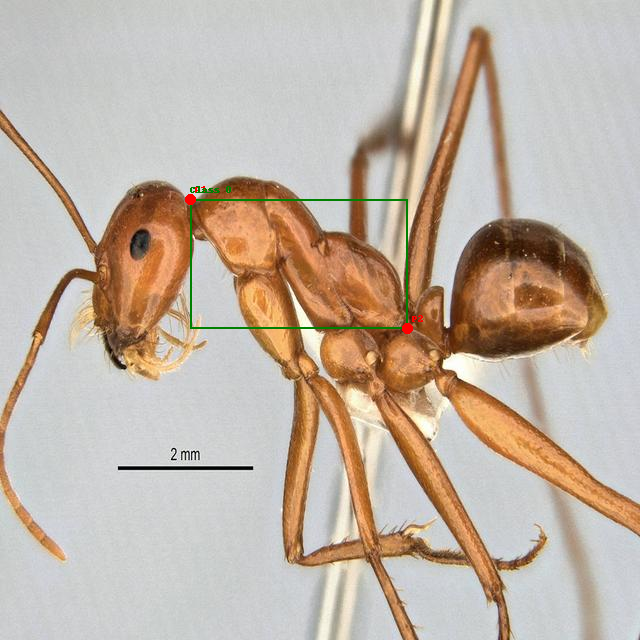

In [1]:
from utils import visualize_single_pair_labels
image_path = './thorax_dataset/images/train/anic32-900190-1_p_1.jpg'
label_path = './thorax_dataset/labels/train/anic32-900190-1_p_1.txt'
visualize_single_pair_labels(image_path, label_path)

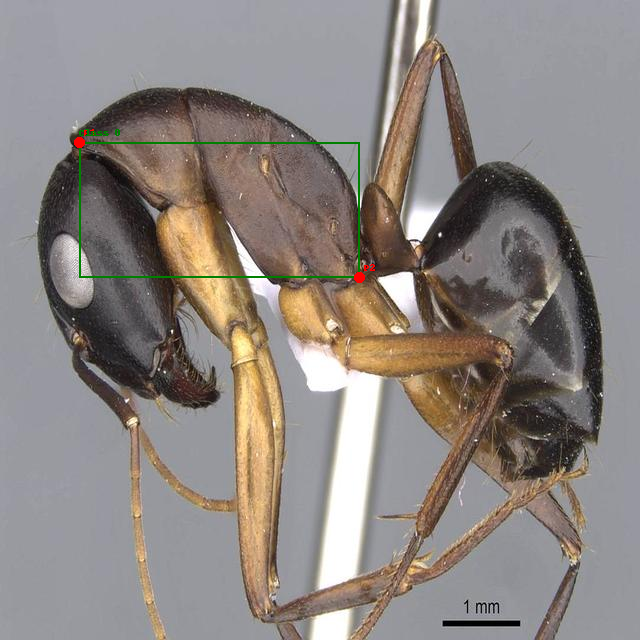

In [2]:
from utils import visualize_single_pair_labels, choose_random_file
file = choose_random_file("./thorax_dataset/images/train")
image_path = f'./thorax_dataset/images/train/{file}'
label_path = f'./thorax_dataset/labels/train/{file.replace(".jpg", ".txt")}'
visualize_single_pair_labels(image_path, label_path)

In [3]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("GPU:", torch.cuda.get_device_name(0)) 

PyTorch version: 2.5.1+cu124
CUDA available: True
CUDA version: 12.4
GPU: Tesla V100-SXM2-32GB


In [4]:
from ultralytics import YOLO

# Load the model
model = YOLO("yolo11s-pose.pt")  # Use the pretrained model

# Train the model
model.train(
    data='./thorax_dataset/dataset.yaml', #"./thorax_dataset/dataset.yaml",
    epochs=100,
    batch=16,
    imgsz=640,
    verbose=True
)

Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.5.1+cu124 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=pose, mode=train, model=yolo11s-pose.pt, data=./thorax_dataset/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

train: Scanning /mnt/lts4/scratch/home/abdelrah/ml_project_2/thorax_dataset/labels/train... 114 images, 0 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 1329.41it/s]

train: New cache created: /mnt/lts4/scratch/home/abdelrah/ml_project_2/thorax_dataset/labels/train.cache
WARNING ⚠️ No 'flip_idx' array defined in data.yaml, setting augmentation 'fliplr=0.0'



val: Scanning /mnt/lts4/scratch/home/abdelrah/ml_project_2/thorax_dataset/labels/val... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<00:00, 985.36it/s]

val: New cache created: /mnt/lts4/scratch/home/abdelrah/ml_project_2/thorax_dataset/labels/val.cache


Plotting labels to runs/pose/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/pose/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.32G      3.711      4.185          0      7.251      3.393          1        640: 100%|██████████| 8/8 [00:03<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         38         38          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.39G      2.643       2.88          0      2.893      2.276          2        640: 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         38         38      0.564      0.632      0.541      0.129      0.713      0.842      0.841      0.345



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.43G      2.057      1.072          0      1.764      1.541          6        640: 100%|██████████| 8/8 [00:01<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         38         38      0.649      0.658      0.667      0.262      0.863      0.868       0.93      0.598



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.45G      1.987     0.7747          0       1.64      1.535          5        640: 100%|██████████| 8/8 [00:01<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         38         38      0.656      0.803       0.77      0.345      0.869      0.737      0.856      0.628



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.44G      1.898     0.7391          0      1.433      1.553          4        640: 100%|██████████| 8/8 [00:01<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

                   all         38         38      0.447      0.829      0.582      0.257      0.447      0.829      0.588      0.501



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.44G      1.754     0.5598          0      1.402      1.442          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all         38         38      0.407      0.579      0.397      0.184      0.467      0.579      0.467       0.34



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.46G       1.83     0.6553          0      1.437      1.489          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all         38         38      0.296      0.211      0.133     0.0429      0.222      0.158      0.142     0.0765



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.44G      2.094      0.802          0      1.657      1.668          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all         38         38    0.00469     0.0789    0.00212   0.000808    0.00842      0.632    0.00709    0.00308



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.46G      1.725     0.6658          0      1.284      1.412          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.42it/s]

                   all         38         38    0.00469     0.0789    0.00212   0.000808    0.00842      0.632    0.00709    0.00308



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.45G      1.601      0.383          0      1.226      1.332          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.45it/s]

                   all         38         38     0.0833     0.0263     0.0448    0.00448     0.0833     0.0263     0.0657     0.0243



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.46G       1.65      0.373          0      1.133      1.335          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all         38         38    0.00304      0.211    0.00184   0.000816    0.00456      0.316    0.00301    0.00148



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.45G       1.64     0.3446          0      1.093      1.365          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         38         38     0.0103      0.316    0.00771    0.00303     0.0129      0.526     0.0116    0.00836



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.45G      1.664     0.3398          0      1.241      1.376          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         38         38      0.476      0.184      0.217      0.113      0.476      0.184      0.276      0.223



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.45G      1.589      0.296          0      1.149      1.386          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         38         38     0.0168     0.0789    0.00807    0.00403     0.0221      0.105     0.0158    0.00956



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.45G      1.545     0.3361          0      1.118      1.332          8        640: 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         38         38    0.00825      0.158    0.00535    0.00181     0.0145      0.289     0.0128    0.00717



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.45G      1.413     0.2072          0     0.9826      1.288          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all         38         38    0.00782     0.0789    0.00358    0.00101      0.082     0.0789      0.075      0.016



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.45G      1.499     0.2643          0      1.056      1.295          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.77it/s]

                   all         38         38     0.0396      0.105     0.0267    0.00905      0.154      0.316      0.103     0.0462



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.45G      1.463     0.3299          0      1.021      1.298          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         38         38      0.477      0.789      0.636      0.292      0.552      0.921       0.75      0.668



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.45G       1.58     0.3131          0      1.116       1.37          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         38         38      0.899      0.942      0.928      0.472      0.924      0.966      0.961      0.944



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.45G      1.401     0.2167          0      1.072      1.248          5        640: 100%|██████████| 8/8 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         38         38      0.902      0.921      0.935      0.504      0.929      0.947      0.955      0.931



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.45G       1.28     0.2017          0     0.9267      1.189          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         38         38      0.831      0.904       0.92      0.486      0.831      0.904      0.928      0.885



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.45G      1.351     0.1687          0     0.9057      1.215          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         38         38      0.971      0.947      0.948      0.555      0.965      0.947      0.973      0.918



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.45G      1.336     0.2703          0     0.9535      1.268          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38         38      0.868      0.868      0.887      0.375      0.865      0.868      0.914      0.895



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.45G      1.223      0.241          0     0.8778       1.17          7        640: 100%|██████████| 8/8 [00:01<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         38         38      0.956      0.868       0.94      0.536      0.956      0.868      0.952      0.911



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.45G       1.27      0.172          0     0.8863      1.185          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         38         38      0.947      0.937      0.968       0.58      0.947      0.937       0.97      0.968



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.45G      1.294     0.1825          0     0.8449        1.2          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         38         38      0.945      0.921      0.953      0.567      0.945      0.921      0.964      0.959



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.45G      1.461     0.2109          0      0.893       1.25          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38         38      0.825      0.816      0.872      0.493      0.825      0.816      0.891      0.876



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.45G      1.492      0.249          0     0.9308      1.297          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         38         38      0.898      0.927       0.94      0.604      0.924       0.96      0.973      0.957



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.45G      1.324     0.1873          0     0.9628      1.203          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         38         38        0.9      0.947      0.961      0.532      0.945          1      0.985      0.957



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.45G      1.337     0.1977          0     0.9124      1.224          8        640: 100%|██████████| 8/8 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         38         38      0.826       0.75      0.844      0.461      0.884      0.802      0.919      0.882



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.45G      1.283     0.2118          0     0.9428      1.162          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38         38      0.903      0.921      0.957      0.514      0.903      0.921      0.972      0.965



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.45G      1.261      0.175          0      0.984      1.144          1        640: 100%|██████████| 8/8 [00:01<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         38         38      0.993      0.974      0.976      0.563      0.993      0.974      0.989      0.985



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.45G      1.192     0.2471          0     0.8198      1.158          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         38         38      0.959      0.921      0.948      0.558      0.984      0.947      0.989      0.976



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.45G      1.107     0.1825          0     0.8031      1.097          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all         38         38      0.972      0.912      0.978      0.593      0.996      0.974      0.986      0.982



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.45G      1.215     0.1639          0     0.8335      1.184          4        640: 100%|██████████| 8/8 [00:01<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         38         38      0.989      0.921      0.964      0.573      0.989      0.921      0.978      0.969



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.45G      1.271     0.1501          0     0.8735      1.186          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all         38         38          1      0.916      0.963      0.513          1      0.916      0.963      0.949



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.45G      1.316     0.3035          0     0.9624      1.181          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all         38         38      0.947      0.921      0.944      0.549      0.947      0.932      0.972      0.957



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.45G       1.22     0.2125          0     0.8383       1.15          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all         38         38      0.916      0.895      0.941      0.515       0.95      0.921      0.969      0.958



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.45G      1.315     0.2153          0      1.036      1.218          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]

                   all         38         38      0.965      0.974      0.983      0.553      0.965      0.974       0.99      0.983



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.45G      1.041     0.1171          0     0.7672       1.09          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         38         38      0.994      0.947      0.982      0.603      0.994      0.947      0.984      0.982



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.45G      1.147      0.143          0     0.8344      1.137          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         38         38          1      0.936      0.983      0.563          1      0.936      0.987       0.98



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.45G       1.18     0.1449          0     0.8069      1.136          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all         38         38      0.991      0.947       0.98       0.55      0.991      0.947       0.98      0.977



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.45G      1.199      0.335          0     0.8968      1.236          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]

                   all         38         38      0.993      0.947      0.981        0.6      0.993      0.947      0.981      0.972



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.45G      1.225     0.1788          0     0.8544       1.17          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         38         38          1      0.942      0.984      0.596          1      0.942      0.984      0.978



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.45G      1.053     0.1602          0     0.8128      1.089          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         38         38       0.99      0.947      0.979      0.588       0.99      0.947      0.985      0.981



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.45G      1.093     0.1891          0     0.8618      1.118          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         38         38      0.999      0.974      0.976      0.575      0.999      0.974       0.99      0.978



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.45G      1.037     0.1191          0     0.7394      1.059          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]

                   all         38         38       0.97      0.921       0.91      0.569          1      0.972      0.987      0.979



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.45G      1.068     0.1213          0     0.7075      1.057          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.64it/s]

                   all         38         38      0.947      0.947      0.959      0.584      0.974      0.973      0.983      0.975



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.45G      1.115     0.1128          0     0.7817      1.098          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all         38         38          1      0.972      0.982      0.605          1      0.972      0.982      0.976



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.45G      1.055     0.1162          0      0.747      1.111          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         38         38          1      0.971      0.982        0.6          1      0.971      0.982      0.978



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.45G     0.9485     0.1371          0     0.6486      1.043          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.71it/s]

                   all         38         38          1      0.971      0.987      0.614          1      0.971      0.992      0.986



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.45G     0.9272    0.09829          0     0.6397      1.049          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]

                   all         38         38          1      0.946      0.974       0.58          1      0.946      0.986      0.979



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.45G     0.9785    0.08792          0     0.6987      1.059          2        640: 100%|██████████| 8/8 [00:01<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.76it/s]

                   all         38         38      0.999      0.947      0.955      0.584      0.999      0.947      0.976      0.966



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.45G     0.9423    0.08041          0     0.6394      1.033          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         38         38      0.998      0.947      0.981      0.637      0.998      0.947      0.981      0.977



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.45G     0.9694     0.1037          0     0.6756      1.044          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all         38         38      0.973      0.974      0.993      0.651      0.973      0.974      0.993      0.993



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.45G     0.9545    0.09181          0     0.6825      1.033          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]

                   all         38         38      0.995      0.974       0.99       0.63      0.995      0.974      0.994      0.994



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.45G     0.9405    0.09826          0     0.6611      1.037          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         38         38          1      0.971      0.982      0.608          1      0.987      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.45G     0.8653     0.0524          0     0.6045      1.004          4        640: 100%|██████████| 8/8 [00:01<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all         38         38      0.996      0.974      0.993      0.624      0.996      0.974      0.993      0.989



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.45G     0.9147     0.1446          0     0.6196       1.01          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         38         38      0.973      0.947       0.99       0.63          1      0.973      0.993      0.989



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.45G     0.9677    0.08642          0     0.6805      1.013          8        640: 100%|██████████| 8/8 [00:01<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         38         38      0.989      0.947      0.988      0.616      0.989      0.947      0.988      0.987



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.45G     0.9716    0.07661          0     0.7047      1.031          4        640: 100%|██████████| 8/8 [00:01<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         38         38      0.972      0.918      0.978      0.593      0.973      0.947       0.98      0.975



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.45G     0.9437     0.1054          0     0.6517      1.058          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.70it/s]

                   all         38         38      0.989      0.947      0.978      0.591      0.989      0.947      0.978      0.972



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.45G     0.8669     0.0825          0     0.6571      1.012          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all         38         38      0.994      0.947      0.982      0.585      0.994      0.947      0.982      0.976



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.45G      1.013     0.1026          0     0.7305      1.064          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]

                   all         38         38      0.997      0.947      0.987      0.616      0.997      0.947      0.987      0.979



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.45G     0.8997    0.08631          0     0.6676      1.045          2        640: 100%|██████████| 8/8 [00:01<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         38         38      0.974      0.971      0.992      0.655      0.974      0.971      0.992      0.992



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.45G     0.8467    0.08346          0     0.6091     0.9984          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         38         38      0.974      0.973      0.989      0.629      0.974      0.973      0.991       0.99



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.45G      1.013     0.1013          0     0.6909      1.046          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         38         38      0.998      0.974      0.985      0.628      0.998      0.974      0.989      0.981



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.45G     0.8664    0.06715          0     0.5963     0.9922          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.52it/s]

                   all         38         38      0.998      0.974      0.987      0.633      0.998      0.974       0.99      0.985



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.45G      0.831    0.08089          0     0.6094      1.014          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]

                   all         38         38      0.999      0.974      0.992      0.628      0.999      0.974      0.992      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.45G     0.8626    0.07635          0     0.6041      1.035          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         38         38      0.998      0.974      0.994      0.629      0.998      0.974      0.994      0.994



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.45G     0.8272    0.07797          0     0.5747     0.9975          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all         38         38      0.998          1      0.995      0.651      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.45G     0.8473    0.08686          0     0.6436      1.022          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         38         38          1      0.974      0.994      0.653          1      0.974      0.994      0.993



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.45G     0.9118    0.07745          0     0.6348      1.049          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.87it/s]

                   all         38         38          1      0.973      0.994      0.642          1      0.973      0.994      0.994



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.45G     0.8306    0.05647          0     0.5976     0.9991          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         38         38      0.997          1      0.995      0.642      0.997          1      0.995      0.994



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.45G     0.7427    0.05865          0      0.524      0.983          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all         38         38          1      0.998      0.995       0.64          1      0.998      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.45G     0.7329     0.0464          0     0.5501     0.9594          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all         38         38      0.974      0.996      0.994       0.65      0.974      0.996      0.994      0.994



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.45G     0.8016    0.08388          0      0.584     0.9992          4        640: 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         38         38      0.998      0.974      0.994      0.628      0.998      0.974      0.994      0.994



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.45G     0.8525    0.07627          0     0.6426       1.02          4        640: 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         38         38          1      0.998      0.995      0.633          1      0.998      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.45G      0.762    0.08684          0     0.5736     0.9889          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all         38         38      0.998      0.974      0.994      0.638      0.998      0.974      0.994      0.994



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.45G     0.7231    0.04884          0     0.5398     0.9679          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]

                   all         38         38          1          1      0.995      0.651          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.45G     0.7612    0.06554          0      0.564     0.9909          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         38         38          1      0.973      0.993      0.637          1      0.973      0.993      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.45G     0.9115     0.0656          0     0.7787       1.01          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         38         38          1      0.974      0.986      0.628          1      0.974      0.991      0.989



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.45G     0.7227    0.05219          0      0.545     0.9324          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]

                   all         38         38          1      0.974      0.984       0.62          1      0.974      0.991      0.988



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.45G     0.7174    0.05508          0     0.5304     0.9743          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.81it/s]

                   all         38         38          1      0.973      0.981      0.633          1      0.973      0.988      0.985



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.45G     0.6888    0.05704          0     0.5333     0.9416          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]

                   all         38         38          1      0.972      0.982      0.636          1      0.972      0.989      0.988



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.45G     0.6711    0.05957          0     0.5099     0.9515          4        640: 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.89it/s]

                   all         38         38          1      0.972      0.982      0.629          1      0.972      0.991      0.989



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.45G     0.7091    0.04066          0     0.5199     0.9617          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         38         38          1      0.973      0.995      0.632          1      0.973      0.995      0.992



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.45G     0.6901    0.02629          0     0.5233     0.9405          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all         38         38          1      0.995      0.995      0.635          1      0.995      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.45G     0.7091    0.04243          0     0.5287      0.944          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all         38         38          1      0.998      0.995      0.646          1      0.998      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.45G     0.6702    0.06785          0     0.5234     0.9575          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all         38         38      0.998      0.974      0.994      0.637      0.998      0.974      0.994      0.994


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.45G     0.5009    0.03307          0     0.3817     0.8638          2        640: 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         38         38      0.998      0.974      0.994      0.635      0.998      0.974      0.994      0.994



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.45G     0.5208     0.0249          0     0.3442      0.874          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.87it/s]

                   all         38         38      0.998      0.974      0.994      0.627      0.998      0.974      0.994      0.994



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.45G     0.5345    0.02891          0     0.3686     0.8526          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all         38         38      0.998      0.974      0.994      0.621      0.998      0.974      0.994      0.994



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.45G     0.5241    0.02221          0     0.3495     0.8683          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         38         38      0.998      0.974      0.994      0.624      0.998      0.974      0.994      0.994



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.45G     0.4892    0.02192          0     0.3481     0.8516          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.45it/s]

                   all         38         38      0.998      0.974      0.994      0.629      0.998      0.974      0.994      0.994



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.45G     0.4233     0.0219          0      0.333     0.8402          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         38         38      0.998      0.974      0.994      0.631      0.998      0.974      0.994      0.994



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.45G     0.4275     0.0228          0     0.3175     0.8352          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         38         38          1      0.998      0.995      0.642          1      0.998      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.45G     0.4813    0.02052          0     0.3417      0.847          2        640: 100%|██████████| 8/8 [00:00<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.73it/s]

                   all         38         38          1      0.998      0.995      0.641          1      0.998      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.45G     0.4457    0.03496          0     0.3189     0.8289          2        640: 100%|██████████| 8/8 [00:00<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         38         38          1      0.998      0.995      0.644          1      0.998      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.45G     0.4233    0.02557          0     0.3273     0.8579          2        640: 100%|██████████| 8/8 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]

                   all         38         38          1      0.998      0.995      0.642          1      0.998      0.995      0.995



100 epochs completed in 0.056 hours.
Optimizer stripped from runs/pose/train/weights/last.pt, 19.8MB
Optimizer stripped from runs/pose/train/weights/best.pt, 19.8MB

Validating runs/pose/train/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.5.1+cu124 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLO11s-pose summary (fused): 257 layers, 9,699,471 parameters, 0 gradients, 22.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.87it/s]


                   all         38         38      0.974      0.971      0.992      0.654      0.974      0.971      0.992      0.992
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/pose/train


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7977cc1f5630>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    

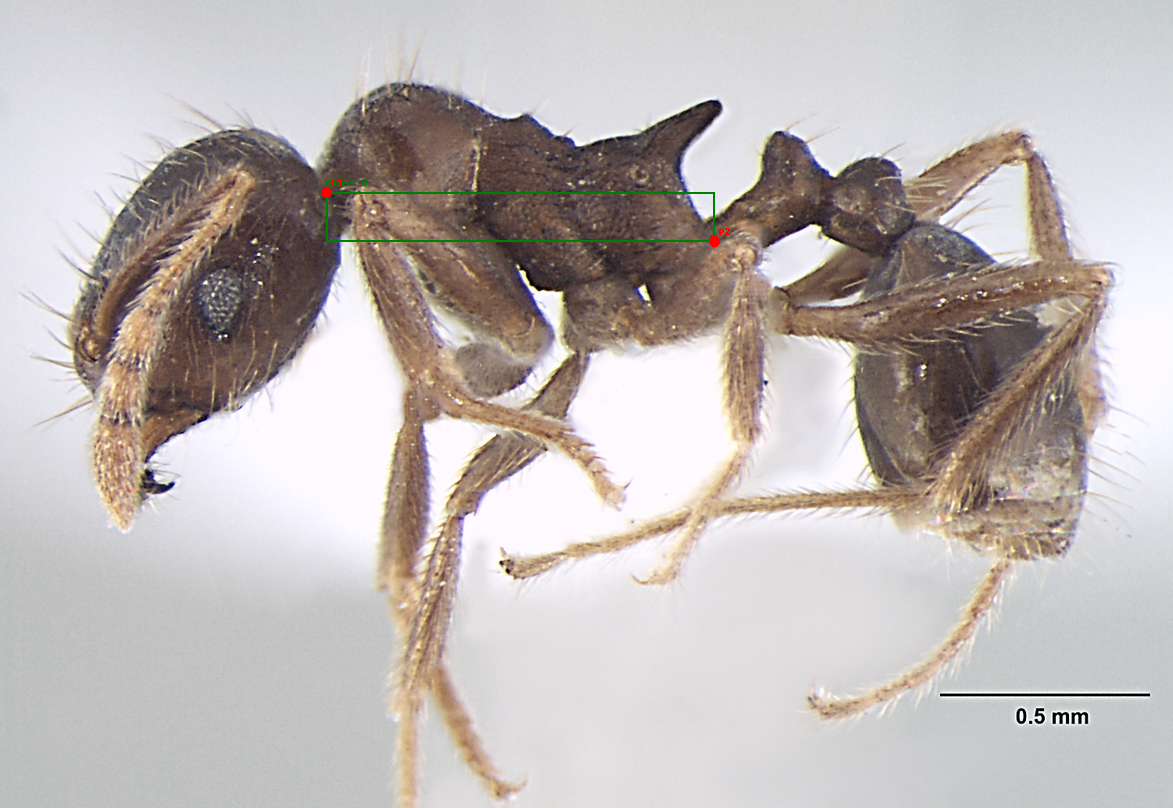

In [5]:
visualize_single_pair_labels('./thorax_dataset/images/test/antweb1008086_p_1.jpg', './thorax_dataset/images/test/antweb1008086_p_1.txt')


image 1/1 /mnt/lts4/scratch/home/abdelrah/ml_project_2/original/antweb1008008_p_1.jpg: 448x640 1 thorax, 48.4ms
Speed: 2.0ms preprocess, 48.4ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


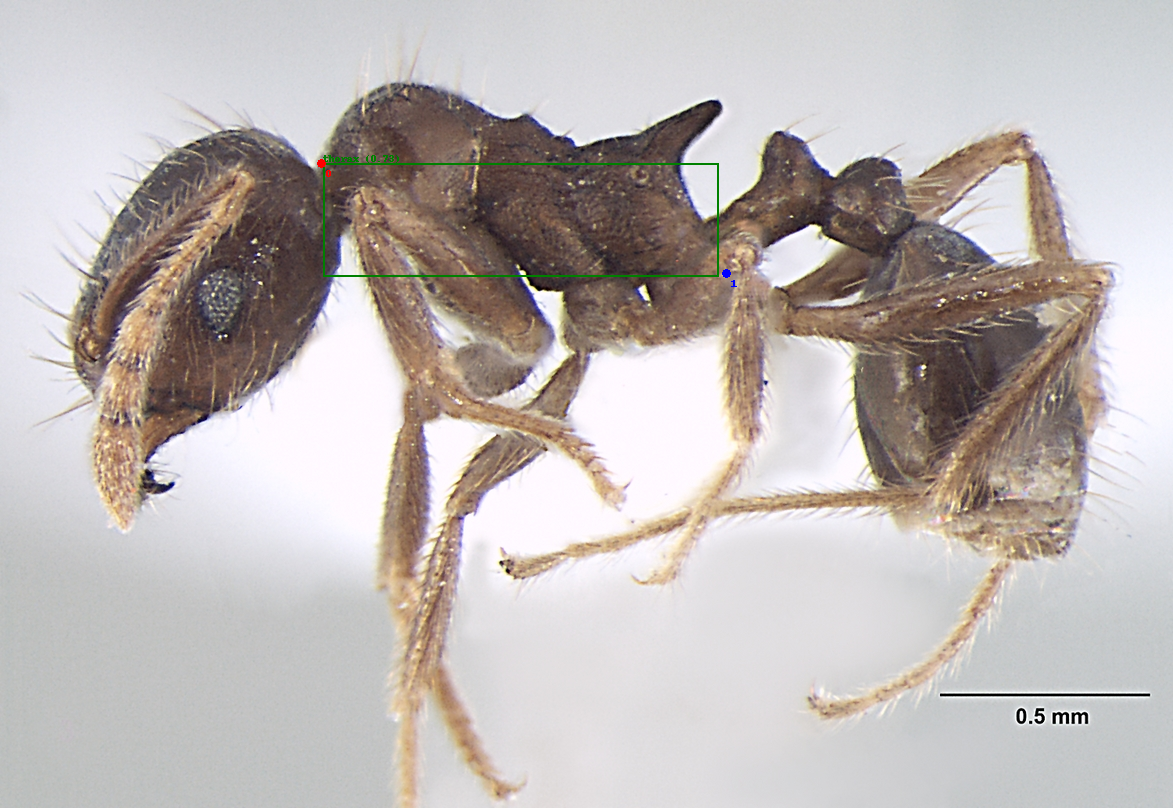

In [6]:
from utils import visualize_predictions

image_path = './thorax_dataset/images/test/antweb1008086_p_1.jpg'
results = model.predict(source=image_path)
visualize_predictions(image_path, results)

# Scale bar Only

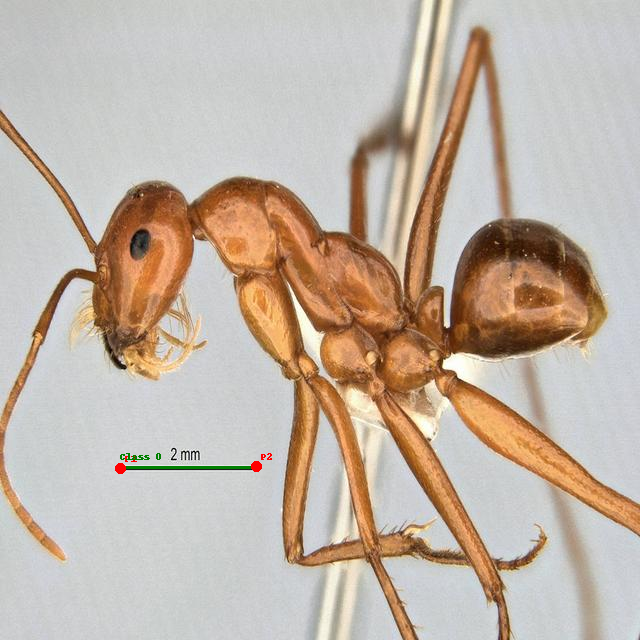

In [7]:
from utils import visualize_single_pair_labels
image_path = './scale_dataset/images/train/anic32-900190-1_p_1.jpg'
label_path = './scale_dataset/labels/train/anic32-900190-1_p_1.txt'
visualize_single_pair_labels(image_path, label_path)

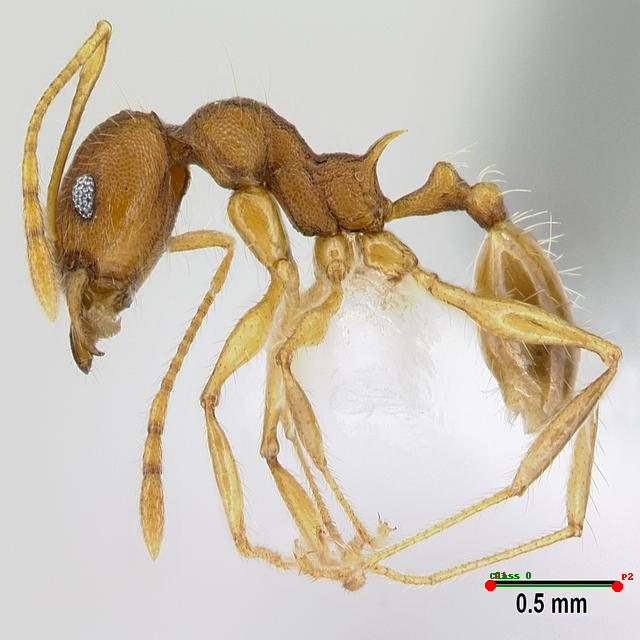

In [8]:
from utils import visualize_single_pair_labels, choose_random_file
file = choose_random_file("./scale_dataset/images/train")
image_path = f'./scale_dataset/images/train/{file}'
label_path = f'./scale_dataset/labels/train/{file.replace(".jpg", ".txt")}'
visualize_single_pair_labels(image_path, label_path)

In [25]:
from ultralytics import YOLO

# Load the model
model = YOLO("yolo11s-pose.pt")  # Use the pretrained model

# Train the model
model.train(
    data='./scale_dataset/dataset.yaml', #"./thorax_dataset/dataset.yaml",
    epochs=100,
    batch=16,
    imgsz=640,
    verbose=True
)

Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.5.1+cu124 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=pose, mode=train, model=yolo11s-pose.pt, data=./scale_dataset/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

train: Scanning /mnt/lts4/scratch/home/abdelrah/ml_project_2/scale_dataset/labels/train.cache... 114 images, 0 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<?, ?it/s]

WARNING ⚠️ No 'flip_idx' array defined in data.yaml, setting augmentation 'fliplr=0.0'



val: Scanning /mnt/lts4/scratch/home/abdelrah/ml_project_2/scale_dataset/labels/val.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]


Plotting labels to runs/pose/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/pose/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.43G      2.277      8.052          0      158.2     0.8953          1        640: 100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.54it/s]

                   all         38         38          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/100       4.4G     0.7681      9.278          0      140.8     0.4079          2        640: 100%|██████████| 8/8 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         38         38          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.43G      4.182      6.359          0      5.595      2.299          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all         38         38    0.00966     0.0526    0.00293   0.000691          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.45G      4.368      6.033          0      4.658      2.436          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all         38         38   0.000487      0.105   0.000622   0.000132          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.45G      4.529      5.838          0      3.224      2.292          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.31it/s]

                   all         38         38   0.000487      0.105   0.000622   0.000132          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.45G      2.612      3.529          0      2.766      1.347          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.57it/s]

                   all         38         38   0.000487      0.105   0.000622   0.000132          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.47G      4.182      4.828          0      3.225      2.152          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.81it/s]

                   all         38         38   0.000487      0.105   0.000622   0.000132          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.44G      3.903      4.551          0      3.507      2.113          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.15it/s]

                   all         38         38   0.000487      0.105   0.000622   0.000132          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.47G       4.05      4.511          0      3.089      2.056          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         38         38    0.00112     0.0263   0.000807   0.000161     0.0318     0.0789    0.00599    0.00275



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.45G      3.191      2.273          0       2.97      1.569          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]

                   all         38         38   0.000101     0.0263   5.61e-05   2.79e-05   0.000304     0.0789   0.000178   6.44e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.46G       3.87      3.832          0      3.053       1.95          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all         38         38     0.0236      0.105    0.00421   0.000818     0.0118     0.0526    0.00547    0.00243



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.45G      3.513      3.272          0      2.586      1.809          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all         38         38    0.00611     0.0789   0.000856   0.000222     0.0126      0.105    0.00221   0.000608



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.45G      3.315       3.03          0      2.804       1.68          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all         38         38      0.104     0.0263    0.00854   0.000854     0.0295     0.0526      0.006    0.00225



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.45G      3.812      3.908          0      2.802      2.228          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         38         38      0.104     0.0263    0.00854   0.000854     0.0295     0.0526      0.006    0.00225



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.45G      3.555      2.597          0      2.778      1.918          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         38         38   0.000966     0.0263   0.000903   9.03e-05      0.121     0.0789     0.0202    0.00506



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.45G      3.054      2.373          0      2.922      1.811          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         38         38     0.0635     0.0526     0.0242    0.00668       0.15      0.132      0.122     0.0378



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.45G      3.394      2.842          0      2.292      1.863          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.89it/s]

                   all         38         38     0.0992     0.0526     0.0353    0.00755       0.13      0.105      0.056      0.012



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.45G      3.328      1.956          0      2.858       1.75          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]

                   all         38         38     0.0108      0.211     0.0118    0.00237     0.0312      0.605      0.147     0.0849



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.45G      3.523      2.536          0      3.495      1.994          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         38         38    0.00312      0.105    0.00766    0.00155     0.0101      0.342     0.0694     0.0234



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.45G       2.73      1.814          0      2.733       1.58          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]

                   all         38         38    0.00542      0.263     0.0129    0.00224      0.133      0.447      0.205     0.0561



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.45G      2.779      1.397          0       2.72      1.598          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all         38         38    0.00822      0.263     0.0179    0.00492     0.0701      0.474      0.137     0.0485



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.45G      3.295      1.909          0      2.851      1.659          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         38         38    0.00319      0.184     0.0088    0.00304    0.00911      0.526      0.148      0.069



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.45G      3.326       1.76          0      2.809      1.892          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         38         38     0.0524      0.211     0.0602     0.0108      0.111      0.447      0.219      0.083



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.45G      2.933      1.764          0      2.369      1.885          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.44it/s]

                   all         38         38     0.0561      0.105     0.0244    0.00547      0.156      0.289      0.109     0.0289



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.45G      2.875      1.754          0      2.881      1.913          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         38         38     0.0809      0.211     0.0319     0.0104      0.139      0.342        0.1     0.0476



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.45G      3.369      1.611          0      2.823      1.935          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]

                   all         38         38     0.0976      0.105     0.0287    0.00674      0.178      0.263     0.0802     0.0383



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.45G      3.065      1.467          0      2.429      1.614          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.24it/s]

                   all         38         38     0.0461     0.0789     0.0113     0.0034       0.18      0.184     0.0612     0.0315



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.45G      3.189      2.108          0      3.134      1.832          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.91it/s]

                   all         38         38     0.0685      0.158     0.0191     0.0059      0.139      0.263      0.132      0.073



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.45G      2.776      2.018          0      2.449      1.636          1        640: 100%|██████████| 8/8 [00:00<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]

                   all         38         38     0.0353      0.237     0.0375     0.0117     0.0646      0.368      0.159      0.115



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.45G      2.705      1.297          0      2.424      1.569          1        640: 100%|██████████| 8/8 [00:00<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]

                   all         38         38     0.0387      0.237     0.0323    0.00833     0.0818      0.474      0.155      0.112



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.45G      3.904      1.459          0      2.694          2          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.23it/s]


                   all         38         38     0.0106      0.105      0.014    0.00429      0.016      0.158     0.0152     0.0046

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.45G      3.352      1.244          0      2.831      1.843          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.87it/s]

                   all         38         38     0.0336      0.211     0.0536     0.0165     0.0379      0.237     0.0584     0.0373



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.45G      2.975      1.566          0      2.365      1.624          0        640: 100%|██████████| 8/8 [00:00<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.53it/s]

                   all         38         38    0.00897     0.0526    0.00514    0.00154     0.0822      0.211     0.0922      0.049



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.45G      3.432      1.399          0      2.501      1.892          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.45it/s]

                   all         38         38    0.00897     0.0526    0.00514    0.00154     0.0822      0.211     0.0922      0.049



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.45G      3.263        0.9          0      2.328      1.643          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.82it/s]

                   all         38         38    0.00532     0.0263    0.00291   0.000583     0.0372      0.184      0.074     0.0483



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.45G      2.648      1.055          0      2.275      1.672          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]

                   all         38         38     0.0372      0.184     0.0621     0.0117      0.107      0.579      0.205      0.129



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.45G      2.802     0.7851          0      2.545      1.599          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         38         38     0.0246      0.289     0.0291    0.00553     0.0647      0.579      0.182     0.0904



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.45G      2.751      1.011          0      2.731      1.696          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]

                   all         38         38     0.0216      0.211     0.0309    0.00711     0.0372      0.605      0.189      0.128



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.45G      3.244     0.8632          0      2.463      1.578          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all         38         38     0.0117      0.211     0.0327    0.00746     0.0338      0.605      0.175      0.139



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.45G      2.658      1.019          0      2.345      1.474          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]

                   all         38         38     0.0361      0.395     0.0628     0.0158     0.0318      0.658      0.156      0.126



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.45G      3.608      1.323          0      3.004      1.784          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]

                   all         38         38     0.0285      0.368     0.0725     0.0218     0.0327      0.658      0.218      0.188



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.45G      3.119     0.9229          0      2.587      1.845          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all         38         38      0.022      0.342     0.0646     0.0179     0.0538      0.658      0.241      0.214



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.45G      2.978      1.108          0      2.555       1.92          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all         38         38     0.0387      0.263     0.0518     0.0166     0.0987      0.605      0.243      0.218



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.45G      2.943     0.9671          0      2.988      1.482          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all         38         38     0.0396      0.263     0.0369      0.014      0.101      0.605      0.207      0.154



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.45G      2.558      1.399          0      2.312      1.605          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         38         38      0.004      0.184     0.0423     0.0144     0.0143      0.658      0.269      0.184



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.45G      2.796      1.347          0      2.414      1.555          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         38         38    0.00824      0.158     0.0365    0.00751     0.0343      0.658      0.238      0.169



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.45G      2.736     0.9963          0      2.504       1.81          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all         38         38     0.0308      0.211      0.049     0.0194     0.0964      0.658      0.271      0.239



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.45G      2.578     0.9663          0      2.496      1.476          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]

                   all         38         38     0.0431      0.237     0.0527     0.0192     0.0647      0.658      0.267      0.222



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.45G      2.894     0.7199          0      2.419      1.541          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all         38         38     0.0519      0.263     0.0584     0.0212     0.0687      0.632      0.249      0.214



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.45G      2.926     0.7802          0      2.848      1.651          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all         38         38     0.0359      0.263     0.0539     0.0217      0.041      0.658      0.233      0.188



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.45G      2.798     0.5491          0      2.619       1.55          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all         38         38     0.0155      0.289     0.0577     0.0298     0.0353      0.658       0.26      0.216



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.45G      2.301     0.5385          0      2.169      1.392          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]

                   all         38         38     0.0239      0.395     0.0855     0.0265     0.0383      0.632      0.271      0.205



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.45G      2.765     0.8236          0      2.434      1.474          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]

                   all         38         38     0.0324      0.421     0.0845     0.0295     0.0396      0.632      0.287      0.223



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.45G      2.355     0.5763          0      2.683      1.345          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         38         38     0.0214      0.316     0.0693     0.0261     0.0445      0.658      0.258       0.21



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.45G      2.752     0.6544          0      2.358      1.389          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         38         38     0.0174      0.237     0.0616     0.0272     0.0465      0.632      0.225       0.17



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.45G       2.78     0.8412          0      2.258      1.454          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         38         38     0.0226      0.289     0.0453     0.0165     0.0473      0.605      0.216       0.17



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.45G      2.627      0.688          0      2.455      1.428          0        640: 100%|██████████| 8/8 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         38         38      0.022      0.289     0.0559     0.0214      0.046      0.605      0.256       0.17



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.45G      2.713     0.5904          0      2.838      1.521          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.77it/s]

                   all         38         38     0.0314      0.316     0.0792     0.0182     0.0441      0.605      0.317      0.181



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.45G      2.574      0.798          0      2.393      1.395          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         38         38     0.0239      0.342     0.0617      0.016      0.044      0.632       0.32      0.256



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.45G      2.425     0.8595          0      2.217      1.454          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all         38         38      0.023      0.342      0.054     0.0173     0.0424      0.632      0.275      0.227



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.45G      3.395     0.8924          0      2.501      1.666          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all         38         38     0.0241      0.237     0.0516     0.0189     0.0428      0.632      0.353      0.238



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.45G      2.524     0.6708          0      2.322      1.238          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         38         38     0.0174      0.237      0.054     0.0121     0.0464      0.632      0.386       0.22



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.45G      2.959      1.004          0      2.309      1.478          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         38         38     0.0202      0.237     0.0393    0.00798     0.0539      0.632      0.435      0.338



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.45G      2.475      0.479          0      2.169      1.317          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.60it/s]

                   all         38         38     0.0181      0.211     0.0356     0.0083     0.0544      0.632      0.379      0.332



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.45G      2.854     0.7751          0      2.332       1.36          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         38         38     0.0272      0.263     0.0974     0.0221     0.0534      0.658       0.38      0.304



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.45G      3.132     0.8116          0      2.473      1.674          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all         38         38     0.0322      0.395     0.0872     0.0287     0.0684      0.632      0.353      0.283



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.45G       2.52      0.451          0       2.32       1.49          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]

                   all         38         38     0.0371      0.342     0.0801     0.0276      0.087      0.632      0.297      0.256



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.45G      2.417     0.4766          0      2.217      1.308          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.37it/s]

                   all         38         38     0.0364      0.474     0.0936     0.0479      0.138      0.605      0.243      0.211



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.45G      2.299     0.4432          0      2.383       1.25          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all         38         38     0.0278      0.395     0.0765      0.036     0.0877      0.605      0.212      0.184



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.45G      2.443     0.6113          0      2.166      1.419          0        640: 100%|██████████| 8/8 [00:00<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]

                   all         38         38     0.0265      0.395     0.0747     0.0345     0.0921      0.605      0.195      0.174



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.45G      2.408     0.5149          0      2.403      1.325          1        640: 100%|██████████| 8/8 [00:00<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         38         38     0.0284      0.395     0.0625     0.0199     0.0721      0.632      0.202      0.168



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.45G      2.703     0.8499          0        2.7      1.556          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         38         38     0.0257      0.368     0.0441     0.0148      0.044      0.632       0.21      0.173



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.45G      1.941     0.5572          0      2.247      1.139          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]

                   all         38         38     0.0253      0.368     0.0422     0.0157     0.0434      0.632       0.27      0.203



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.45G      2.613      1.113          0      2.933      1.657          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         38         38     0.0264      0.368     0.0462     0.0142     0.0472      0.658      0.277      0.211



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.45G      2.551     0.6496          0       2.32      1.299          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all         38         38     0.0265      0.368     0.0479     0.0152     0.0473      0.658      0.258      0.195



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.45G      2.246      0.487          0      2.204      1.349          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all         38         38     0.0242      0.316     0.0399     0.0156     0.0505      0.658      0.295      0.235



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.45G      2.208     0.4327          0      2.114      1.306          1        640: 100%|██████████| 8/8 [00:01<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         38         38     0.0259      0.316     0.0384     0.0142     0.0539      0.658      0.293       0.23



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.45G      2.896     0.7259          0      2.587      1.431          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.45it/s]

                   all         38         38     0.0251      0.316      0.039      0.016     0.0739      0.658      0.276      0.239



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.45G      2.385     0.3037          0      2.165      1.268          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         38         38     0.0366      0.263     0.0393     0.0183     0.0848      0.658       0.29      0.248



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.45G      2.442     0.6614          0      2.438      1.503          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all         38         38     0.0259      0.289     0.0438     0.0169     0.0893      0.658      0.298       0.25



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.45G      2.155     0.4943          0      1.982      1.271          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all         38         38     0.0278      0.316     0.0532     0.0179     0.0831      0.658      0.286      0.255



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.45G      2.515     0.6844          0      2.404      1.665          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]

                   all         38         38     0.0289      0.342     0.0533     0.0179     0.0927      0.632        0.3      0.249



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.45G      2.473     0.5074          0      2.155      1.331          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         38         38     0.0258      0.316     0.0507     0.0154      0.106      0.632      0.303      0.247



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.45G      2.658     0.5422          0       2.31      1.408          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         38         38     0.0249      0.316     0.0391     0.0129      0.107      0.605      0.283      0.227



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.45G      2.025     0.6961          0      2.474      1.132          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]

                   all         38         38     0.0251      0.316     0.0395     0.0129      0.109      0.579      0.285      0.207



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.45G      2.653     0.4843          0       2.39      1.417          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all         38         38     0.0299      0.368     0.0486     0.0142     0.0928      0.632       0.26      0.205



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.45G      2.688     0.5908          0      2.492      1.525          4        640: 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.71it/s]

                   all         38         38     0.0278      0.342     0.0467     0.0146     0.0592      0.658      0.278      0.234



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.45G      2.147     0.3569          0      2.213      1.335          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all         38         38     0.0257      0.316     0.0442     0.0138     0.0535      0.658      0.241      0.201



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.45G      2.379      0.606          0      2.322      1.349          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all         38         38     0.0276      0.342     0.0483     0.0137     0.0531      0.658      0.238      0.199



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.45G      2.359     0.4382          0      2.123      1.371          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         38         38     0.0276      0.342     0.0433     0.0142     0.0531      0.658      0.224      0.188


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.45G      2.232     0.3709          0      2.309      1.268          1        640: 100%|██████████| 8/8 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]

                   all         38         38     0.0269      0.342     0.0404     0.0131     0.0518      0.658      0.235        0.2



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.45G      2.193     0.4551          0      1.985      1.146          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all         38         38      0.028      0.342     0.0495     0.0145     0.0539      0.658      0.233        0.2



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.45G      1.787     0.2669          0      1.862      1.046          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         38         38     0.0286      0.342     0.0476     0.0153     0.0551      0.658      0.222      0.198



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.45G      1.733     0.8251          0      1.803     0.8146          0        640: 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         38         38     0.0272      0.316     0.0471     0.0171     0.0567      0.658      0.221      0.193



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.45G      2.505     0.2362          0      2.268      1.463          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all         38         38     0.0305      0.342     0.0551     0.0193     0.0587      0.658      0.218      0.195



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.38G      1.686     0.2744          0      1.908      1.016          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all         38         38     0.0304      0.342     0.0579     0.0217     0.0584      0.658      0.214      0.186



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.45G      1.715     0.2785          0      1.882      1.042          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         38         38     0.0326      0.368     0.0612     0.0231     0.0583      0.658      0.218      0.187



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.45G      1.982     0.3923          0      2.292      1.253          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         38         38     0.0357      0.395     0.0731     0.0211     0.0595      0.658      0.239      0.205



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.45G      1.905     0.3173          0       1.96      1.163          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         38         38     0.0336      0.368     0.0677     0.0192       0.06      0.658      0.237      0.206



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.45G      1.861      0.351          0      2.233      1.271          0        640: 100%|██████████| 8/8 [00:00<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         38         38     0.0329      0.368     0.0635     0.0197     0.0587      0.658      0.214      0.192



100 epochs completed in 0.102 hours.
Optimizer stripped from runs/pose/train2/weights/last.pt, 19.8MB
Optimizer stripped from runs/pose/train2/weights/best.pt, 19.8MB

Validating runs/pose/train2/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.5.1+cu124 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLO11s-pose summary (fused): 257 layers, 9,699,471 parameters, 0 gradients, 22.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]


                   all         38         38     0.0203      0.237     0.0393    0.00808     0.0541      0.632      0.427      0.332
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/pose/train2


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7977d7281ff0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    

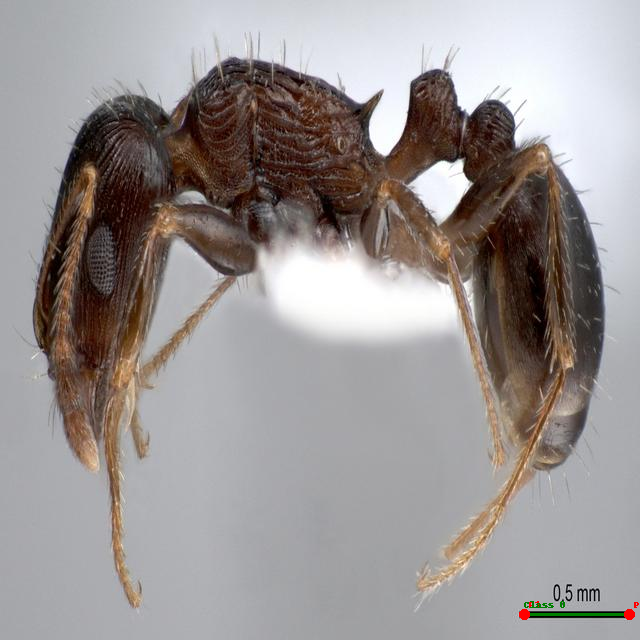

In [26]:
visualize_single_pair_labels('./scale_dataset/images/test/antweb1008086_p_1.jpg', './scale_dataset/labels/test/antweb1008086_p_1.txt')


image 1/1 /mnt/lts4/scratch/home/abdelrah/ml_project_2/scale_dataset/images/test/antweb1008086_p_1.jpg: 640x640 (no detections), 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


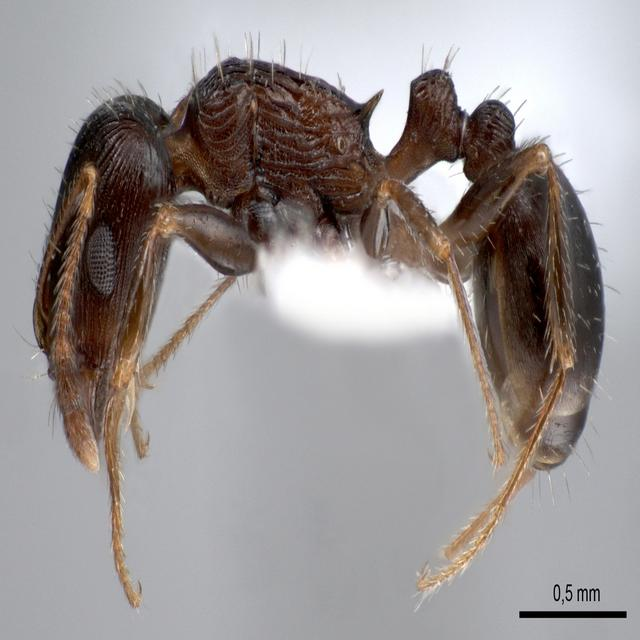

In [27]:
from utils import visualize_predictions
image_path = './scale_dataset/images/test/antweb1008086_p_1.jpg'
results = model.predict(source=image_path)
visualize_predictions(image_path, results)

# Thorax and Scale Bar

In [1]:
from utils import visualize_double_pair_labels

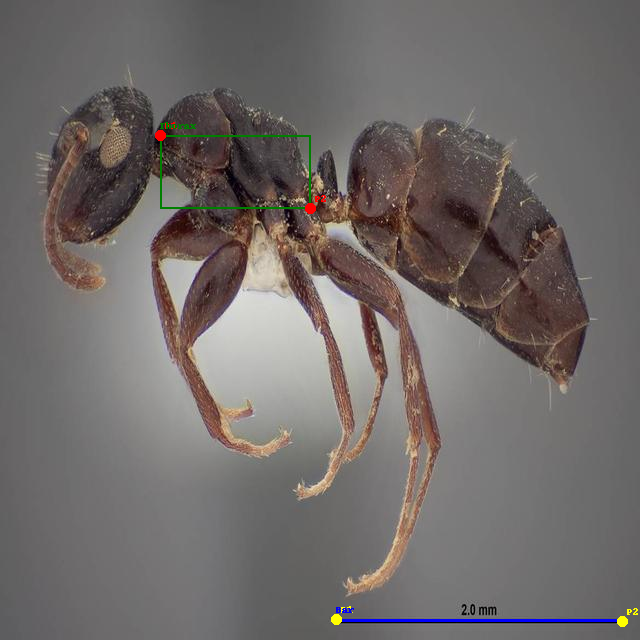

In [2]:
image_path =  './thorax_and_scale_dataset/images/train/fmnhins0000083094_p_1.jpg' #'./thorax_and_scale_dataset/images/train/casent0910427_p_1.jpg'
label_path =  './thorax_and_scale_dataset/labels/train/fmnhins0000083094_p_1.txt' #'./thorax_and_scale_dataset/labels/train/casent0910427_p_1.txt'
visualize_double_pair_labels(image_path, label_path)

In [7]:
from ultralytics import YOLO

# Load the model
model = YOLO("yolo11s-pose.pt")  # Use the pretrained model

# Train the model
model.train(
    data="./thorax_and_scale_dataset/dataset.yaml",
    epochs=100,
    batch=16,
    imgsz=640,
    verbose=True
)

Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.5.1+cu124 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=pose, mode=train, model=yolo11s-pose.pt, data=./thorax_and_scale_dataset/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

train: Scanning /mnt/lts4/scratch/home/abdelrah/ml_project_2/thorax_and_scale_dataset/labels/train.cache... 114 images, 0 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<?, ?it/s]
val: Scanning /mnt/lts4/scratch/home/abdelrah/ml_project_2/thorax_and_scale_dataset/labels/val.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]


Plotting labels to runs/pose/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/pose/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.41G      3.405      9.694          0      5.794      3.278          2        640: 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         38         76    0.00217      0.316    0.00421   0.000997    0.00307      0.474      0.004     0.0004



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.44G      2.344      9.033          0      4.103      2.063          4        640: 100%|██████████| 8/8 [00:01<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all         38         76      0.646      0.261      0.163     0.0559    0.00376      0.224    0.00284   0.000284



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.44G      1.973      6.972          0      2.821      1.711          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         38         76      0.686      0.395      0.246     0.0855    0.00475      0.487    0.00805   0.000805



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.45G      2.051      6.332          0      2.748      1.687          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         38         76      0.779      0.316       0.29     0.0964    0.00552      0.421    0.00516   0.000516



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.45G      2.043       5.72          0      2.605      1.599          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]

                   all         38         76      0.762      0.421      0.297       0.14      0.508     0.0132    0.00198   0.000198



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.45G      1.993      5.236          0      2.362      1.656          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]

                   all         38         76      0.562      0.342     0.0523     0.0182   0.000388     0.0263   0.000122   1.22e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.48G      2.044      5.881          0      2.381      1.698          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         38         76      0.565      0.408      0.116     0.0432   0.000821     0.0395   0.000337   4.16e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.45G      2.202      5.858          0      2.533       1.81          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         38         76     0.0173      0.105    0.00679    0.00156    0.00185      0.355    0.00232   0.000232



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.47G      2.109      5.937          0      2.242      1.635          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         38         76   6.28e-05     0.0132   3.23e-05   3.23e-06    0.00161     0.0395   0.000454   4.54e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.46G      1.926       5.27          0      2.174      1.571          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         38         76   4.42e-05     0.0132   2.26e-05   4.52e-06      0.504      0.303     0.0161    0.00161



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.47G      2.041       5.31          0      2.076      1.591          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         38         76   4.55e-05     0.0132   2.26e-05   2.26e-06    0.00033     0.0789   0.000189   1.89e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.46G      1.928      4.955          0      1.915      1.565          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all         38         76      0.502      0.342    0.00163   0.000719   0.000711      0.145   0.000474    6.5e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.46G      1.927      5.332          0      1.929       1.53          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         38         76      0.506      0.289     0.0067    0.00254      0.505      0.158    0.00744    0.00107



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.46G      1.915      4.999          0      1.875      1.575          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]

                   all         38         76      0.502     0.0658   0.000793   0.000301      0.501     0.0132   0.000104   2.77e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.46G      1.915       5.21          0      1.758      1.528         10        640: 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]

                   all         38         76   0.000643      0.118    0.00039   0.000101   0.000234     0.0526   0.000131   1.31e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.46G      1.789      5.047          0      1.672      1.464          4        640: 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         38         76      0.502      0.263    0.00359    0.00114      0.502     0.0789   0.000641   0.000323



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.46G      1.856      5.327          0      1.871      1.533          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         38         76      0.559      0.139     0.0326     0.0127      0.556      0.132     0.0391     0.0236



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.46G      1.956      4.585          0      1.621      1.567          8        640: 100%|██████████| 8/8 [00:01<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         38         76      0.524     0.0658     0.0141    0.00533      0.505     0.0132   0.000842   0.000342



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.46G      1.943       5.06          0      1.702      1.504          3        640: 100%|██████████| 8/8 [00:00<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         38         76      0.607      0.171     0.0722     0.0308      0.597      0.111     0.0391     0.0248



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.46G      1.878      4.837          0      1.716      1.503          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all         38         76      0.827      0.276      0.315      0.149      0.842      0.276      0.307       0.23



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.46G      1.696      5.308          0      1.523      1.416          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         38         76      0.844      0.289      0.336      0.151      0.777      0.329      0.301       0.19



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.46G      1.711      4.212          0      1.421      1.409          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         38         76      0.523      0.342     0.0232    0.00975      0.527      0.342     0.0265     0.0188



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.46G      1.795       5.14          0      1.557      1.471          4        640: 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         38         76      0.508      0.158     0.0062    0.00235       0.51      0.211    0.00711    0.00437



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.46G      1.663      4.263          0      1.437      1.393          8        640: 100%|██████████| 8/8 [00:01<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         38         76       0.51      0.197    0.00608    0.00192      0.507     0.0395    0.00122   0.000499



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.46G      1.711      4.147          0      1.405      1.457          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.70it/s]

                   all         38         76      0.511     0.0132    0.00385    0.00138   0.000403     0.0526   0.000226   5.48e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.46G      1.885      4.858          0      1.415      1.499          4        640: 100%|██████████| 8/8 [00:01<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all         38         76      0.607      0.158     0.0827     0.0285      0.536     0.0921     0.0102    0.00545



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.46G      1.776      4.134          0      1.437      1.417          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]

                   all         38         76      0.977      0.434      0.469      0.222       0.94      0.383      0.398      0.247



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.46G      1.831      4.691          0      1.438      1.467          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         38         76      0.912      0.432      0.452      0.244       0.88      0.421      0.429      0.227



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.46G      1.801      3.904          0      1.374      1.443          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all         38         76      0.914      0.408      0.466      0.268      0.874      0.368      0.378      0.327



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.46G      1.725        4.1          0      1.462      1.414          9        640: 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         38         76      0.934      0.395      0.463      0.252      0.903      0.368      0.391      0.284



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.46G      1.889      4.702          0      1.448      1.458          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]

                   all         38         76      0.897      0.447      0.434      0.238      0.901      0.382      0.373      0.236



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.46G      1.804       4.28          0       1.32      1.544          3        640: 100%|██████████| 8/8 [00:00<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         38         76       0.95      0.487      0.498      0.261      0.913      0.447      0.413      0.264



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.46G      1.589      3.985          0      1.198       1.37          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all         38         76      0.963      0.421      0.457      0.253      0.919      0.407      0.393      0.214



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.46G      1.654      3.639          0      1.218      1.389          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all         38         76      0.943      0.406      0.442      0.229      0.879      0.355        0.3      0.121



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.46G      1.659       4.14          0       1.34      1.385          4        640: 100%|██████████| 8/8 [00:01<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.52it/s]

                   all         38         76      0.972      0.447      0.499       0.27      0.898      0.395      0.367      0.216



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.46G      1.658      3.674          0      1.307      1.434          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all         38         76      0.944      0.447      0.472      0.263      0.903      0.408       0.37      0.242



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.46G      1.682      3.547          0      1.295       1.38          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all         38         76      0.899      0.465      0.457      0.197      0.865      0.426      0.366      0.247



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.46G      1.593      3.754          0      1.214      1.322          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all         38         76      0.916      0.474      0.466      0.236      0.893      0.447      0.401      0.268



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.46G      1.689      3.644          0      1.435      1.414          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all         38         76      0.949      0.468      0.495      0.263      0.874       0.39      0.374      0.245



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.46G      1.534      3.936          0      1.208      1.322          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         38         76      0.935      0.447      0.498      0.251      0.914       0.38      0.409      0.297



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.46G      1.634      3.814          0      1.253      1.346          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         38         76      0.933      0.423      0.469      0.249      0.907      0.404      0.402      0.243



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.46G      1.649      4.306          0      1.271      1.334          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.96it/s]

                   all         38         76      0.983      0.474      0.497      0.233      0.929      0.421      0.373      0.176



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.46G      1.724      3.772          0      1.357        1.5          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         38         76      0.941      0.461      0.482       0.26      0.891      0.408      0.357      0.185



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.46G      1.662       3.37          0      1.311      1.424          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         38         76      0.513      0.487      0.497       0.25      0.408      0.406      0.346      0.137



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.46G      1.581      3.518          0      1.185      1.353          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         38         76      0.986      0.447      0.498      0.263      0.927      0.395      0.363      0.227



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.46G      1.571      4.565          0      1.376      1.334          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         38         76      0.973      0.454      0.479      0.259      0.959      0.441      0.444      0.297



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.46G      1.484      3.114          0      1.213      1.308          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]

                   all         38         76          1      0.472      0.515      0.295      0.958      0.433      0.438      0.273



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.46G      1.419      3.432          0       1.05      1.238          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.45it/s]

                   all         38         76      0.987      0.485      0.503      0.267      0.934      0.434      0.399      0.303



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.46G      1.567      2.894          0       1.11      1.293          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all         38         76          1      0.472      0.503      0.245      0.958      0.433      0.423      0.293



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.46G      1.515      3.147          0      1.115      1.329          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         38         76      0.981        0.5      0.525      0.276      0.926      0.421       0.39      0.245



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.46G      1.438      3.055          0      1.031      1.238          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         38         76      0.984      0.487      0.514      0.298      0.957      0.461      0.441       0.34



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.46G      1.379      3.001          0      1.004      1.253          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         38         76      0.962      0.483      0.529      0.281      0.961      0.468      0.467      0.384



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.46G      1.521      3.283          0      1.121      1.327          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]

                   all         38         76      0.985      0.474      0.513       0.31      0.947      0.446      0.418      0.286



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.46G      1.344      3.166          0     0.9961        1.2          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]

                   all         38         76      0.991      0.474      0.505       0.29      0.929      0.434      0.416       0.28



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.46G      1.504       2.91          0      1.059      1.272          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.45it/s]

                   all         38         76      0.998      0.487      0.501      0.298      0.944      0.434      0.408      0.274



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.46G      1.395      3.389          0      1.045      1.246          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.32it/s]

                   all         38         76      0.987      0.482      0.513      0.302      0.947      0.443      0.438      0.356



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.46G      1.322      3.213          0     0.9777      1.224          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]

                   all         38         76      0.987      0.484      0.523      0.311      0.904      0.408      0.394      0.287



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.46G      1.377      2.964          0     0.9738      1.236          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all         38         76      0.998      0.487      0.521      0.312      0.957      0.447      0.429      0.341



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.46G      1.355      3.389          0     0.9748      1.208          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         38         76      0.999      0.487       0.52      0.303      0.958      0.447      0.421      0.354



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.46G      1.387      2.969          0      1.012       1.22          9        640: 100%|██████████| 8/8 [00:01<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         38         76      0.999      0.487       0.53      0.306      0.972      0.461      0.441      0.334



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.46G      1.361      2.986          0       1.04       1.22          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         38         76          1      0.485      0.521      0.311      0.973      0.459       0.44      0.336



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.46G      1.338      2.429          0     0.9677      1.229          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         38         76      0.974      0.473      0.496      0.274      0.947      0.447       0.43      0.334



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.46G      1.415      2.981          0      1.029      1.249          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         38         76      0.986      0.487      0.501      0.281      0.968      0.434      0.434       0.33



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.46G      1.399      2.988          0      1.055      1.239          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all         38         76      0.961      0.474      0.503      0.281      0.948      0.461      0.456      0.347



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.46G      1.392      3.084          0     0.9927      1.277          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all         38         76      0.979      0.461      0.526      0.279       0.96      0.447      0.457      0.364



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.46G      1.309      2.894          0     0.9446      1.221          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]

                   all         38         76      0.995      0.487      0.538      0.299      0.967      0.461       0.44      0.385



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.46G      1.503      3.109          0      1.099      1.233          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         38         76          1      0.487      0.556        0.3      0.973      0.461      0.441      0.327



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.46G      1.328        2.5          0      0.967      1.202          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         38         76      0.998      0.487      0.555      0.312      0.971      0.461       0.44      0.283



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.46G      1.271      2.689          0     0.8656      1.208          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         38         76      0.999      0.487      0.547      0.295      0.972      0.461      0.441       0.31



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.46G      1.309      3.362          0       0.92      1.233          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         38         76      0.701        0.5      0.536      0.273      0.972      0.461      0.443      0.329



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.46G      1.313      2.935          0     0.9195        1.2          4        640: 100%|██████████| 8/8 [00:01<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.71it/s]

                   all         38         76       0.58      0.513      0.522      0.278      0.972      0.461      0.444      0.309



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.46G      1.438      2.941          0      1.067      1.248          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all         38         76      0.592      0.511      0.518        0.3       0.97      0.461      0.442      0.324



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.46G      1.297      2.784          0     0.9762      1.189          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         38         76      0.545        0.5       0.52      0.289      0.971      0.461      0.441      0.329



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.46G      1.387      3.412          0     0.9881      1.201          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]

                   all         38         76      0.958      0.487      0.544      0.305      0.971      0.461       0.44      0.331



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.46G      1.191      2.818          0     0.8775      1.132          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]

                   all         38         76      0.994      0.487      0.539      0.323      0.981      0.474      0.464      0.347



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.46G      1.222      2.772          0      1.057      1.153          1        640: 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         38         76      0.932      0.487      0.548      0.311      0.973      0.474      0.464      0.361



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.46G      1.283      3.198          0     0.9247      1.172          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all         38         76      0.759      0.505      0.548      0.334      0.972      0.461      0.441      0.342



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.46G      1.323      2.446          0     0.9927      1.188          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         38         76      0.711      0.526      0.545      0.324      0.945      0.434      0.406      0.256



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.46G      1.242      2.658          0     0.9035      1.188          3        640: 100%|██████████| 8/8 [00:00<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]

                   all         38         76      0.936      0.513      0.558      0.308      0.945      0.434      0.403      0.252



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.46G      1.215      3.101          0     0.8825      1.157          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         38         76      0.999      0.487      0.522      0.302      0.985      0.474      0.466       0.34



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.46G      1.202      2.804          0     0.8918      1.155          4        640: 100%|██████████| 8/8 [00:01<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         38         76          1      0.486      0.515      0.317          1      0.486      0.489      0.396



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.46G      1.315      3.104          0      1.017      1.215          3        640: 100%|██████████| 8/8 [00:00<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all         38         76      0.999      0.487      0.516      0.313      0.999      0.487      0.489      0.408



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.46G      1.181      2.883          0     0.8644      1.126          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         38         76      0.994      0.487      0.516      0.313      0.994      0.487      0.489      0.402



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.46G      1.103      2.923          0     0.8213       1.12          8        640: 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         38         76          1      0.482       0.51      0.318          1      0.482      0.489      0.393



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.46G      1.135      2.387          0     0.7975      1.101          7        640: 100%|██████████| 8/8 [00:01<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]

                   all         38         76      0.997      0.487      0.514      0.324      0.997      0.487      0.489      0.421



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.46G      1.121      2.983          0     0.8135      1.115          5        640: 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all         38         76      0.998      0.487      0.514      0.308      0.998      0.487       0.49       0.41



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.46G      1.135      2.945          0     0.8229      1.128          9        640: 100%|██████████| 8/8 [00:00<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         38         76      0.584        0.5      0.522      0.296      0.999      0.487       0.49      0.381



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.46G      1.093      2.722          0     0.9014      1.114          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all         38         76      0.538        0.5      0.525      0.294      0.985      0.474      0.466      0.319



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.46G       1.12      2.668          0     0.8022      1.104          6        640: 100%|██████████| 8/8 [00:01<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.71it/s]

                   all         38         76       0.53        0.5       0.53      0.303      0.984      0.474      0.465      0.316



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.46G      1.204      2.459          0      0.879      1.188          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         38         76      0.543      0.513      0.533      0.308      0.985      0.474      0.465      0.349


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.46G     0.9656      2.313          0     0.6587       1.02          3        640: 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.64it/s]

                   all         38         76      0.998      0.487      0.532       0.31      0.985      0.474      0.465      0.366



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.46G     0.9549      2.719          0     0.6557      1.025          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.60it/s]

                   all         38         76      0.554      0.526      0.517      0.301      0.972      0.474      0.465      0.387



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.46G     0.9087      2.321          0     0.6278     0.9961          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         38         76      0.603        0.5      0.513      0.314      0.998      0.487       0.49      0.393



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.46G     0.8857      2.275          0     0.6067      1.001          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         38         76      0.549      0.507      0.513      0.317      0.985      0.474      0.472      0.391



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.46G      0.908       2.21          0     0.6497      1.006          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]

                   all         38         76      0.561      0.512      0.514      0.318      0.985      0.474      0.471      0.383



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.46G     0.8022      2.144          0     0.5818     0.9691          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.74it/s]

                   all         38         76      0.547        0.5      0.521      0.317      0.985      0.474      0.471      0.375



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.46G      0.863      2.192          0     0.5813     0.9922          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all         38         76      0.537        0.5      0.518      0.316      0.972      0.461      0.442      0.362



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.46G      0.942      2.288          0     0.6809      1.017          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.81it/s]

                   all         38         76      0.541        0.5      0.519      0.322      0.999      0.487      0.489      0.355



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.46G     0.9416      2.475          0     0.6245     0.9886          3        640: 100%|██████████| 8/8 [00:01<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.77it/s]

                   all         38         76      0.568      0.513      0.518      0.322      0.999      0.487      0.489      0.342



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.46G     0.9136        2.1          0     0.6023      1.026          2        640: 100%|██████████| 8/8 [00:01<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all         38         76      0.565      0.513      0.524      0.321      0.986      0.474      0.464      0.325



100 epochs completed in 0.055 hours.
Optimizer stripped from runs/pose/train2/weights/last.pt, 19.8MB
Optimizer stripped from runs/pose/train2/weights/best.pt, 19.8MB

Validating runs/pose/train2/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.5.1+cu124 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLO11s-pose summary (fused): 257 layers, 9,700,254 parameters, 0 gradients, 22.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]


                   all         38         76      0.996      0.487      0.514      0.324      0.996      0.487      0.489      0.421
                thorax         38         38      0.992      0.974      0.978       0.63      0.992      0.974      0.978      0.841
                   bar         38         38          1          0     0.0506     0.0173          1          0   0.000775   7.75e-05
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/pose/train2


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aa1f5d070d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 


image 1/1 /mnt/lts4/scratch/home/abdelrah/ml_project_2/thorax_and_scale_dataset/images/train/casent0910427_p_1.jpg: 640x640 1 thorax, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


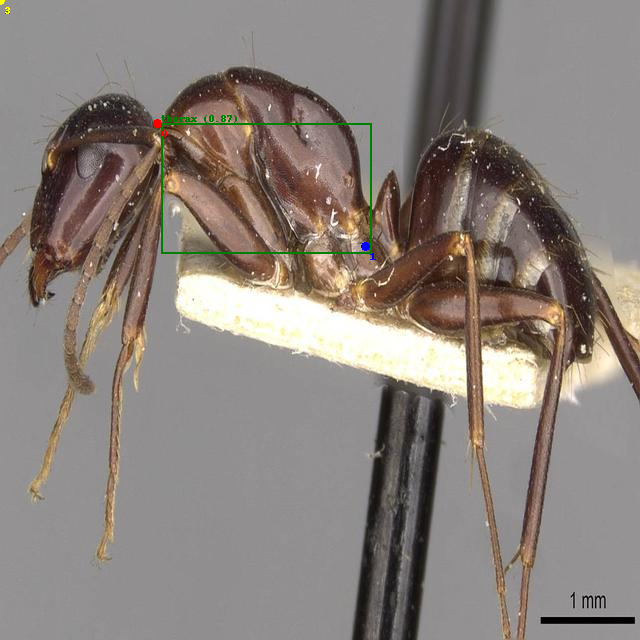

In [8]:
from utils import visualize_predictions
image_path = './thorax_and_scale_dataset/images/train/casent0910427_p_1.jpg'
results = model.predict(source=image_path)
visualize_predictions(image_path, results)

In [9]:
results[0].keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: None
data: tensor([[[157.2105, 123.7178],
         [365.7355, 246.4126],
         [  0.0000,   0.0000],
         [  0.0000,   0.0000]]], device='cuda:0')
has_visible: False
orig_shape: (640, 640)
shape: torch.Size([1, 4, 2])
xy: tensor([[[157.2105, 123.7178],
         [365.7355, 246.4126],
         [  0.0000,   0.0000],
         [  0.0000,   0.0000]]], device='cuda:0')
xyn: tensor([[[0.2456, 0.1933],
         [0.5715, 0.3850],
         [0.0000, 0.0000],
         [0.0000, 0.0000]]], device='cuda:0')